In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D


In [369]:
input_image_shape = (28,28,1)
num_classes = 9

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_image_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.load_weights('./datasets/digitRecognition.h5')

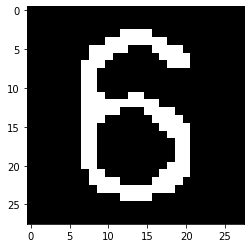

In [370]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
#load image
numbers = [0,1,2,3,4,5,6,7,8,9]
img = cv2.imread('./no9.png',0)
_, thresh_number = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
thresh_number = cv2.erode(thresh_number,kernel,iterations=1) 
thresh_number = cv2.morphologyEx(thresh_number,cv2.MORPH_CLOSE,kernel)
img = thresh_number
plt.imshow(img,cmap="gray")

0.16198979591836735
(7, 7) (21, 21)
0.3622448979591837


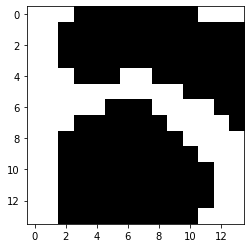

In [371]:
white_pixels = cv2.countNonZero(img)
total_pixels = img.shape[0]*img.shape[1]

print(white_pixels/total_pixels)

#count number of white pixels in center

x1 = img.shape[1]//4
x2 = x1 + img.shape[1]//2
y1 = img.shape[0]//4
y2 = y1 + img.shape[0]//2

print((x1,y1),(x2,y2))
cropped_roi = img[x1:x2,y1:y2]
plt.imshow(cropped_roi,cmap="gray")
white_pixels = cv2.countNonZero(cropped_roi)
total_pixels = cropped_roi.shape[0]*cropped_roi.shape[1]
print(white_pixels/total_pixels)
# 0.04591836734693878
# (7, 7) (21, 21)
# 0.15306122448979592

(1, 28, 28, 1)

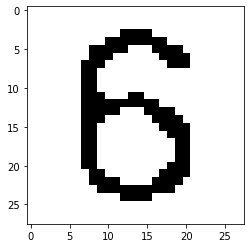

In [372]:
img = cv2.bitwise_not(img)
plt.imshow(img,cmap="gray")
new_img = img.reshape(-1,28,28,1)
new_img = new_img.astype('float32')
new_img = new_img/255
new_img.shape

In [373]:
prediction = model.predict([new_img])
prediction

array([[4.71763945e-14, 9.48216793e-15, 1.42493164e-07, 4.93351223e-14,
        9.63718176e-01, 2.39577591e-02, 2.35827423e-14, 1.23240035e-02,
        1.38056545e-11]], dtype=float32)

In [368]:
number = np.argmax(prediction[0])+1
number

5